### Analiza danych w języku Julia

Plan

- podstawowe funkcje wejścia, wyjścia
- praca  z plikami
- praca z plikami csv
- pakiet DataFrames
- wizualizacja za pomocą pakietu Gadfly
- zbiory danych w RDatasets
- przykłady analizy danych

Część przykładów pochodzi  z książek :
- Julia High Performance by Avik Sengupta (120 pages; published: 2016-05; ISBN: 9781785880919) T
- Mastering Julia by Malcolm Sherrington - published by Packt Publishing (410 pages; published: 2015-07; ISBN: 9781783553310)
- Getting Started with Julia Programming by Ivo Balbaert - published by Packt Publishing (214 pages; published: 2015-02-28; ISBN: 9781783284795)

### Podstawowe wejście, wyjście 

- Julia widzi dane jako strumień bajtów
- podstawowymi funkcjami są read() oraz write(), które operują na binarnym I/O
- nad tymi funkcjami są zaimplementowane bardziej wygodne funkcje wyższego poziomu.
- Julia operuje na strumieniach wejścia (STDIN), wyjścia (STDOUT) oraz błędu (STDERR) 


#### Przykłady działania funkcji read  w terminalu Julii

Funkcja nie  działa w Jupiterze,.

```bash

julia> read(STDIN,Char)
a
'a': ASCII/Unicode U+0061 (category Ll: Letter, lowercase)

julia> read(STDIN, 8)
12345678
8-element Array{UInt8,1}:
 0x31
 0x32
 0x33
 0x34
 0x35
 0x36
 0x37
 0x38


julia> read(STDIN,UInt32)
1234
0x34333231


julia> read(STDIN,Int32)
1234
875770417


julia> hex(875770417)
"34333231"

```

In [1]:
# readline() oraz readline(STDIN)otwierają  STDIN> prompt widget w Jupiterze
# W Julii można użyć też czytania znaków poprzez funkcję read() - nie działa w Jupiterze
readline()

STDIN> 1


"1"

In [2]:
#funkcja write() wypisuje zawartość binarnego strumienia, zwraca liczbę bytów STDOUT
#np. 0x61 - x = heksadecymalny kod "a" pamiętany w UInt (ze względu na ilość bitów jest to UInt8)
write(STDOUT, 0x61)

a

1

In [3]:
typeof(0x61)

UInt8

In [4]:
typeof(97)

Int64

In [5]:
# dziesiatkowy kod "a" pamiętany w Int64
write(STDOUT, 97)

a       

8

In [6]:
#dodanie ";" powoduje, że funkcja nic nie zwraca
write(STDOUT, 0x62);

b

In [7]:
# dla stringów 
write(STDOUT, "abcd")

abcd

4

In [8]:
# do tekstowego IO można  użyć wysokopoziomowego  print
print(STDOUT,0x61)

97

### Pliki

Do pracy z plikami uzywamy typu IOStream

In [9]:
f = open("hello.txt")

IOStream(<file hello.txt>)

In [10]:
#Typ IOStream
fieldnames(f)

4-element Array{Symbol,1}:
 :handle
 :ios   
 :name  
 :mark  

In [11]:
# wskaźnik do obiektu pliku
f.handle

Ptr{Void} @0x00007f4eefe249b0

In [12]:
# nazwa pliku
f.name

"<file hello.txt>"

In [13]:
# można wczytać zawartość plików do tablicy Array
data1=readlines(f)

8-element Array{String,1}:
 "I say high, you say low."                                     
 "You say why and I say I don't know, oh no."                   
 "You say goodbye and I say hello"                              
 "(Hello goodbye hello goodbye) hello hello"                    
 "(Hello goodbye) I don't know why you say goodbye, I say hello"
 "(Hello goodbye hello goodbye) hello hello"                    
 "(Hello goodbye) I don't know why you say goodbye"             
 "(Hello goodbye) I say hello. "                                

In [14]:
# czytanie z wczytanej wcześniej struktury danych typu Array 
for line in data1
    println(line)
end

I say high, you say low.
You say why and I say I don't know, oh no.
You say goodbye and I say hello
(Hello goodbye hello goodbye) hello hello
(Hello goodbye) I don't know why you say goodbye, I say hello
(Hello goodbye hello goodbye) hello hello
(Hello goodbye) I don't know why you say goodbye
(Hello goodbye) I say hello. 


In [15]:
# należy pamiętać o zamknięciu pliku po użyciu, aby zwolnić zasoby
close(f)

### Wygodna składnia z automatycznym zamknięciem pliku po wyjściu z pętli
```julia
open("hello.txt") do file
 # przetwarzanie pliku
 process(file)
   
end ```
albo można podać nazwe funkcji przetwarzającej jako parametr:
```julia
open(process, "hello.txt")
```

In [16]:
#przykład - przetwarza plik linia po linii
open("hello.txt") do file
 for line in eachline(file)
        print(line)
    end
end


I say high, you say low.You say why and I say I don't know, oh no.You say goodbye and I say hello(Hello goodbye hello goodbye) hello hello(Hello goodbye) I don't know why you say goodbye, I say hello(Hello goodbye hello goodbye) hello hello(Hello goodbye) I don't know why you say goodbye(Hello goodbye) I say hello. 

In [17]:
function read_and_capitalize(f::IOStream)
    return uppercase(readstring(f))
end

read_and_capitalize (generic function with 1 method)

In [18]:
# funkcji open można też użyć bez składni do, podając nazwę funkcji przetwarzającej (tutaj read_and_capitalize())
open(read_and_capitalize, "hello.txt")

"I SAY HIGH, YOU SAY LOW.\nYOU SAY WHY AND I SAY I DON'T KNOW, OH NO.\nYOU SAY GOODBYE AND I SAY HELLO\n(HELLO GOODBYE HELLO GOODBYE) HELLO HELLO\n(HELLO GOODBYE) I DON'T KNOW WHY YOU SAY GOODBYE, I SAY HELLO\n(HELLO GOODBYE HELLO GOODBYE) HELLO HELLO\n(HELLO GOODBYE) I DON'T KNOW WHY YOU SAY GOODBYE\n(HELLO GOODBYE) I SAY HELLO. \n"

In [19]:
#otwieranie pliku do zapisu za pomocą flagi "w" - uwaga - kasuje poprzednią zawartość pliku!
fname ="example2.dat"
f2= open(fname, "w")

IOStream(<file example2.dat>)

In [20]:
write(f2, "I write to a file \n")

19

In [21]:
println(f2,"even with println!")
# jeśli podglądniemy plik, nic w nim nie zostanie zapisane, dopóki go nie zamkniemy 

In [22]:
close(f2)

In [23]:
# dodawanie do pliku
fname ="example3.dat"
f2= open(fname, "a")

IOStream(<file example3.dat>)

In [24]:
write(f2, "I write to a file \n")

19

In [25]:
close(f2)

### Obsługa plików csv
- csv - comma-separated file 
- dane odseparowane "," albo ";"
- de facto standard dla małych i średnich danych w formie tabel
- każda linijka zawiera dane o jednym obiekcie

In [26]:
# wczytanie danych z pliku za pomocą funkcji readdlm do wielowymiarowej tablicy  typów Any
fname="winequality.csv"
# https://docs.julialang.org/en/stable/stdlib/io-network/#Base.readdlm
data10=readdlm(fname, ';')

1600×12 Array{Any,2}:
   "fixed acidity"   "volatile acidity"  …    "alcohol"   "quality"
  7.4               0.7                      9.4         5         
  7.8               0.88                     9.8         5         
  7.8               0.76                     9.8         5         
 11.2               0.28                     9.8         6         
  7.4               0.7                  …   9.4         5         
  7.4               0.66                     9.4         5         
  7.9               0.6                      9.4         5         
  7.3               0.65                    10           7         
  7.8               0.58                     9.5         7         
  7.5               0.5                  …  10.5         5         
  6.7               0.58                     9.2         5         
  7.5               0.5                     10.5         5         
  ⋮                                      ⋱   ⋮                     
  5.8               0.61  

In [27]:
# podajemy nazwę pliku, separator, typ danych (może być numeryczny, string lub Any), 
#line separator, czy traktować pierwszą linię jako nagłówek

data3=readdlm(fname, ';', Float64, '\n', header=true)

([7.4 0.7 … 9.4 5.0; 7.8 0.88 … 9.8 5.0; … ; 5.9 0.645 … 10.2 5.0; 6.0 0.31 … 11.0 6.0], AbstractString["fixed acidity" "volatile acidity" … "alcohol" "quality"])

In [28]:
typeof(data3)

Tuple{Array{Float64,2},Array{AbstractString,2}}

In [29]:
#nagłówek
data3[2]

1×12 Array{AbstractString,2}:
 "fixed acidity"  "volatile acidity"  …  "sulphates"  "alcohol"  "quality"

In [30]:
# dane
data3[1]

1599×12 Array{Float64,2}:
  7.4  0.7    0.0   1.9  0.076  11.0   34.0  0.9978   3.51  0.56   9.4  5.0
  7.8  0.88   0.0   2.6  0.098  25.0   67.0  0.9968   3.2   0.68   9.8  5.0
  7.8  0.76   0.04  2.3  0.092  15.0   54.0  0.997    3.26  0.65   9.8  5.0
 11.2  0.28   0.56  1.9  0.075  17.0   60.0  0.998    3.16  0.58   9.8  6.0
  7.4  0.7    0.0   1.9  0.076  11.0   34.0  0.9978   3.51  0.56   9.4  5.0
  7.4  0.66   0.0   1.8  0.075  13.0   40.0  0.9978   3.51  0.56   9.4  5.0
  7.9  0.6    0.06  1.6  0.069  15.0   59.0  0.9964   3.3   0.46   9.4  5.0
  7.3  0.65   0.0   1.2  0.065  15.0   21.0  0.9946   3.39  0.47  10.0  7.0
  7.8  0.58   0.02  2.0  0.073   9.0   18.0  0.9968   3.36  0.57   9.5  7.0
  7.5  0.5    0.36  6.1  0.071  17.0  102.0  0.9978   3.35  0.8   10.5  5.0
  6.7  0.58   0.08  1.8  0.097  15.0   65.0  0.9959   3.28  0.54   9.2  5.0
  7.5  0.5    0.36  6.1  0.071  17.0  102.0  0.9978   3.35  0.8   10.5  5.0
  5.6  0.615  0.0   1.6  0.089  16.0   59.0  0.9943   3.58  0.

In [31]:
#trzeci wiersz dot danych jednego z rodzajów wina
row3=data3[1][3,:]

12-element Array{Float64,1}:
  7.8  
  0.76 
  0.04 
  2.3  
  0.092
 15.0  
 54.0  
  0.997
  3.26 
  0.65 
  9.8  
  5.0  

In [32]:
# kolumna dot kwasu cytrynowego w każdym z rodzajów wina
col3=data3[1][:,3]

1599-element Array{Float64,1}:
 0.0 
 0.0 
 0.04
 0.56
 0.0 
 0.0 
 0.06
 0.0 
 0.02
 0.36
 0.08
 0.36
 0.0 
 ⋮   
 0.11
 0.33
 0.2 
 0.15
 0.09
 0.13
 0.08
 0.08
 0.1 
 0.13
 0.12
 0.47

In [33]:
# definiujemy typ Wino i wczytujemy do niego dane z tablicy:
type Wine
    fixed_acidity::Float64
    volatile_acidity::Float64
    citric_acid::Float64
    residual_sugar::Float64
    chlorides::Float64
    free_sulfur_dioxide::Float64
    total_sulfur_dioxide::Float64
    density::Float64
    pH::Float64
    sulphates::Float64
    alcohol::Float64
    quality::Float64
end   

In [34]:
data4=data3[1]
wine1=Wine(data3[1][1,:]...)

Wine(7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4, 5.0)

In [35]:
writedlm("partial.dat", data4,';')

In [36]:
# jeśli chcemy namewrować danymi przed zapisem, można użyć schematu z poniższego przykładu.

# przyklad zapisu dziesieciu 3-elementowych krotek o losowych wartościach do pliku csv

fname = "savetuple.csv"
csvfile = open(fname, "w")
#nagłówki
write(csvfile, "ColName A, Colname B, Colname C\n")
for i=1:10
    tup(i)=tuple(rand(Float64,3)...)
    write(csvfile, join(tup(i),","), "\n")
end
close(csvfile)

### DataFrames

- Zaawansowany pakiet do działania na tabelkach nxm danych 
- Podobne do pandas DataFrames w Pythonie albo data.frame w R
- Specjalistyczne funkcje do statystyki
- należy zaistalować pakiety:

```julia
Pkg.add("DataFrames")
Pkg.add("RDatasets")```

- DataFrame to rodzaj bazy danych in-memory
- Składa się z kolumn, do których odwołujemy się używając symboli
- Każda z kolumn może przechowywać inny typ (inaczej niż w dwuwymiarowych tablicach )
- strona pakietu: https://github.com/JuliaStats/DataFrames.jl
- dokumentacja: https://juliadata.github.io/DataFrames.jl/stable/index.html



In [2]:
# wsparcie dla nieistniejących wartości 
# wartość missing 
using DataFrames
missing

missing

In [3]:
typeof(missing)

Missings.Missing

In [4]:
# mozemy tworzyć wektor z takimi wartosciami
x = [1, 2, missing]

3-element Array{Union{Int64, Missings.Missing},1}:
 1       
 2       
  missing

In [5]:
# skipmissing pomija wartości missing
sum(skipmissing(x))

3

In [6]:
# missing + 1 zwraca missing
sum(x)

missing

In [7]:
# nowy wektor bez wartości missing
collect(skipmissing(x))

2-element Array{Int64,1}:
 1
 2

In [8]:
# "wypełnienie" wartości missing 
collect(Missings.replace(x, 1))

3-element Array{Int64,1}:
 1
 2
 1

In [9]:
# Tworzenie DataFrame
using DataFrames
df1=DataFrame()
df1[:MojaKolumna]= 1:4
df1[:Col2]= [e,pi,sqrt(2), 42]
df1[:Col3]= [true,false, true, false]
show(df1)

4×3 DataFrames.DataFrame
│ Row │ MojaKolumna │ Col2    │ Col3  │
├─────┼─────────────┼─────────┼───────┤
│ 1   │ 1           │ 2.71828 │ true  │
│ 2   │ 2           │ 3.14159 │ false │
│ 3   │ 3           │ 1.41421 │ true  │
│ 4   │ 4           │ 42.0    │ false │

In [10]:
typeof(df1[:Col2])

Array{Float64,1}

In [11]:
typeof(df1[:Col3])

Array{Bool,1}

In [12]:
# możemy też utworzyć DataFrame używając konstruktora
df2=DataFrame(MojaKolumna=1:10, 
    Col2=[e,pi, sqrt(2), 3, 4,e,pi, sqrt(2), 3, 4], 
    Col3=[true,true,false,true,false,true,true,false,true,false])

,MojaKolumna,Col2,Col3
1,1,2.71828,true
2,2,3.14159,true
3,3,1.41421,false
4,4,3.0,true
5,5,4.0,false
6,6,2.71828,true
7,7,3.14159,true
8,8,1.41421,false
9,9,3.0,true
10,10,4.0,false


In [13]:
# ilosc wierszy
size(df2, 1) 

10

In [14]:
#ilosc kolumn
size(df2, 2) 

3

In [15]:
# można odwoływać się po indeksie
show(df2[2])

[2.71828, 3.14159, 1.41421, 3.0, 4.0, 2.71828, 3.14159, 1.41421, 3.0, 4.0]

In [16]:
# albo po symbolu kolumny
show(df2[:Col2])

[2.71828, 3.14159, 1.41421, 3.0, 4.0, 2.71828, 3.14159, 1.41421, 3.0, 4.0]

In [17]:
# wiersze lub podzbiory wierszy i kolumn uzyskujemy poprzez operator (:). Wynikiem jest nowy DataFrame
show(df2[3,:])

1×3 DataFrames.DataFrame
│ Row │ MojaKolumna │ Col2    │ Col3  │
├─────┼─────────────┼─────────┼───────┤
│ 1   │ 3           │ 1.41421 │ false │

In [18]:
# drugi i trzeci wiersz
df2[2:3, :]

,MojaKolumna,Col2,Col3
1,2,3.14159,true
2,3,1.41421,false


In [19]:
# druga kolumna drugiego i trzeciego wiersza
df2[2:3, :Col2]

2-element Array{Float64,1}:
 3.14159
 1.41421

In [20]:
# druga i trzecia kolumna drugiego i trzeciego wiersza
df2[2:3,[:Col2, :Col3]]

,Col2,Col3
1,3.14159,true
2,1.41421,false


In [21]:
# pierwsze sześć wierszy
DataFrames.head(df2)

,MojaKolumna,Col2,Col3
1,1,2.71828,true
2,2,3.14159,true
3,3,1.41421,false
4,4,3.0,true
5,5,4.0,false
6,6,2.71828,true


In [22]:
# ostatnie sześć wierszy
DataFrames.tail(df2)

,MojaKolumna,Col2,Col3
1,5,4.0,false
2,6,2.71828,true
3,7,3.14159,true
4,8,1.41421,false
5,9,3.0,true
6,10,4.0,false


In [23]:
# nazwy kolumn
names(df2)

3-element Array{Symbol,1}:
 :MojaKolumna
 :Col2       
 :Col3       

In [24]:
# typy kolumn
eltypes(df2)

3-element Array{Type,1}:
 Int64  
 Float64
 Bool   

In [25]:
# podstawowe dane statystyczne o wartościach w kolumnie
describe(df2)

MojaKolumna
Summary Stats:
Mean:           5.500000
Minimum:        1.000000
1st Quartile:   3.250000
Median:         5.500000
3rd Quartile:   7.750000
Maximum:        10.000000
Length:         10
Type:           Int64

Col2
Summary Stats:
Mean:           2.854818
Minimum:        1.414214
1st Quartile:   2.718282
Median:         3.000000
3rd Quartile:   3.141593
Maximum:        4.000000
Length:         10
Type:           Float64

Col3
Summary Stats:
Mean:           0.600000
Minimum:        0.000000
1st Quartile:   0.000000
Median:         1.000000
3rd Quartile:   1.000000
Maximum:        1.000000
Length:         10
Type:           Bool



In [26]:
mean(df2[:Col2])

2.8548176088843866

In [27]:
var(df2[:Col2])

0.7797205777862606

In [28]:
# colwise aplikuje funkcję do kolumn 
colwise(sum, df2)

3-element Array{Real,1}:
 55     
 28.5482
  6     

In [29]:
#Przeglądanie elementów w kolumnie 
for (i, value) in enumerate(df2[:Col2])
 println(i ," ", value)
end

1 2.718281828459045
2 3.141592653589793
3 1.4142135623730951
4 3.0
5 4.0
6 2.718281828459045
7 3.141592653589793
8 1.4142135623730951
9 3.0
10 4.0


In [30]:
# zamiana wartości na missing w wierszach nieparzystych
df2[:MojaKolumna] = [isodd(i) ? missing : value for (i, value) in enumerate(df2[:MojaKolumna])]

10-element Array{Any,1}:
   missing
  2       
   missing
  4       
   missing
  6       
   missing
  8       
   missing
 10       

In [31]:
df2

,MojaKolumna,Col2,Col3
1,missing,2.71828,true
2,2,3.14159,true
3,missing,1.41421,false
4,4,3.0,true
5,missing,4.0,false
6,6,2.71828,true
7,missing,3.14159,true
8,8,1.41421,false
9,missing,3.0,true
10,10,4.0,false


In [32]:
completecases(df2)

10-element BitArray{1}:
 false
  true
 false
  true
 false
  true
 false
  true
 false
  true

In [33]:
#dropmissing tworzy nowy DataFrame bez wierszy z wartościami missing
dropmissing(df2)

,MojaKolumna,Col2,Col3
1,2,3.14159,true
2,4,3.0,true
3,6,2.71828,true
4,8,1.41421,false
5,10,4.0,false


In [34]:
for (i, value) in enumerate(df2[:MojaKolumna])
 println(i ," ", value)
end

1 missing
2 2
3 missing
4 4
5 missing
6 6
7 missing
8 8
9 missing
10 10


In [35]:
using CSV
input="winequality.csv"
mydata=CSV.read(input, delim=";", types=Dict(6=>Float64, 7=>Float64))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6
5,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
6,7.4,0.66,0.0,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
7,7.9,0.6,0.06,1.6,0.069,15.0,59.0,0.9964,3.3,0.46,9.4,5
8,7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
9,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
10,7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5,5


In [36]:
typeof(mydata)

DataFrames.DataFrame

In [37]:
size(mydata)

(1599, 12)

In [38]:
# zapis do pliku
# wiecej na http://dataframesjl.readthedocs.org/en/latest 
CSV.write("dataframe1.csv", mydata)

CSV.Sink{Void,DataType}(    CSV.Options:
        delim: ','
        quotechar: '"'
        escapechar: '\\'
        missingstring: ""
        dateformat: nothing
        decimal: '.'
        truestring: 'true'
        falsestring: 'false', IOBuffer(data=UInt8[...], readable=true, writable=true, seekable=true, append=false, size=0, maxsize=Inf, ptr=1, mark=-1), "dataframe1.csv", 146, true, String["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality"], 12, false, Val{false})

In [39]:
# wektor danych jakości win
mydata[:alcohol]

1599-element Array{Union{Float64, Missings.Missing},1}:
  9.4
  9.8
  9.8
  9.8
  9.4
  9.4
  9.4
 10.0
  9.5
 10.5
  9.2
 10.5
  9.9
  ⋮  
 10.9
 12.8
  9.2
 11.6
 11.6
 11.0
  9.5
 10.5
 11.2
 11.0
 10.2
 11.0

In [40]:
# posortowane wartości quality (bez powtórzeń)
sort(unique(mydata[:quality]))

6-element Array{Int64,1}:
 3
 4
 5
 6
 7
 8

In [41]:
# sortowanie w miejscu kolejnośc malejąca
head(sort!(mydata, rev = true))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.9976,2.98,0.84,14.9,5
2,15.6,0.685,0.76,3.7,0.1,6.0,43.0,1.0032,2.95,0.68,11.2,7
3,15.6,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
4,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
5,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
6,15.0,0.21,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7


In [42]:
head(sort!(mydata, cols = [:quality]))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,11.6,0.58,0.66,2.2,0.074,10.0,47.0,1.0008,3.25,0.57,9.0,3
2,10.4,0.61,0.49,2.1,0.2,5.0,16.0,0.9994,3.16,0.63,8.4,3
3,10.4,0.44,0.42,1.5,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
4,8.3,1.02,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3
5,7.6,1.58,0.0,2.1,0.137,5.0,9.0,0.99476,3.5,0.4,10.9,3
6,7.4,1.185,0.0,4.25,0.097,5.0,14.0,0.9966,3.63,0.54,10.7,3


In [43]:
# najpierw sortowanie malejąco po jakości, a potem rosnąco po odczynie pH 
head(sort!(mydata, cols = (order(:quality, rev = true), :pH)))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.9987,2.88,0.82,9.8,8
2,10.0,0.26,0.54,1.9,0.083,42.0,74.0,0.99451,2.98,0.63,11.8,8
3,10.7,0.35,0.53,2.6,0.07,5.0,16.0,0.9972,3.15,0.65,11.0,8
4,10.7,0.35,0.53,2.6,0.07,5.0,16.0,0.9972,3.15,0.65,11.0,8
5,9.4,0.3,0.56,2.8,0.08,6.0,17.0,0.9964,3.15,0.92,11.7,8
6,7.9,0.54,0.34,2.5,0.076,8.0,17.0,0.99235,3.2,0.72,13.1,8


In [44]:
# zwraca tablice typu Boolean  w zależności od spełnianego warunku
mydata[:alcohol] .== 9.5

1599-element BitArray{1}:
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
     ⋮
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false

In [45]:
#Zwraca podzbiór dla wierszy spełniających warunek
mydata[mydata[:alcohol] .== 9.5, :]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
2,7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.9968,3.38,0.62,9.5,7
3,8.9,0.59,0.5,2.0,0.337,27.0,81.0,0.9964,3.04,1.61,9.5,6
4,13.3,0.34,0.52,3.2,0.094,17.0,53.0,1.0014,3.05,0.81,9.5,6
5,8.9,0.24,0.39,1.6,0.074,3.0,10.0,0.99698,3.12,0.59,9.5,6
6,11.2,0.67,0.55,2.3,0.084,6.0,13.0,1.0,3.17,0.71,9.5,6
7,8.3,0.49,0.36,1.8,0.222,6.0,16.0,0.998,3.18,0.6,9.5,6
8,10.3,0.43,0.44,2.4,0.214,5.0,12.0,0.9994,3.19,0.63,9.5,6
9,10.3,0.41,0.42,2.4,0.213,6.0,14.0,0.9994,3.19,0.62,9.5,6
10,7.9,0.58,0.23,2.3,0.076,23.0,94.0,0.99686,3.21,0.58,9.5,6


In [46]:
# grupowanie wierszy (tutaj po jakości (quality))
# ostatni argument to funkcja albo wyrażenie 
by(mydata, :quality, x->x)

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_1
1,8,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.9987,2.88,0.82,9.8,8
2,8,10.0,0.26,0.54,1.9,0.083,42.0,74.0,0.99451,2.98,0.63,11.8,8
3,8,10.7,0.35,0.53,2.6,0.07,5.0,16.0,0.9972,3.15,0.65,11.0,8
4,8,10.7,0.35,0.53,2.6,0.07,5.0,16.0,0.9972,3.15,0.65,11.0,8
5,8,9.4,0.3,0.56,2.8,0.08,6.0,17.0,0.9964,3.15,0.92,11.7,8
6,8,7.9,0.54,0.34,2.5,0.076,8.0,17.0,0.99235,3.2,0.72,13.1,8
7,8,9.1,0.4,0.5,1.8,0.071,7.0,16.0,0.99462,3.21,0.69,12.5,8
8,8,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.9988,3.22,0.69,13.4,8
9,8,10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.9976,3.23,0.82,12.6,8
10,8,7.2,0.38,0.31,2.0,0.056,15.0,29.0,0.99472,3.23,0.76,11.3,8


In [47]:
# zliczanie ilosci win pogrupowanych po jakości
wine_grouped=by(mydata, :quality, x->size(x,1))

,quality,x1
1,8,18
2,7,199
3,6,638
4,5,681
5,4,53
6,3,10


In [48]:
# tworzenie histogramu
using StatsBase

hist1=fit(Histogram, collect(skipmissing(mydata[:quality])),nbins=6)
# edges- przedziały histogramu tutaj od 2.0 do 8.0 co 1.0 
# weight - ile elementów w danym przedziale
# tutaj jest 10 win w przedziale [2.0, 3.0)

StatsBase.Histogram{Int64,1,Tuple{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}}}
edges:
  3.0:1.0:9.0
weights: [10, 53, 681, 638, 199, 18]
closed: left
isdensity: false

In [49]:
fieldnames(hist1)

4-element Array{Symbol,1}:
 :edges    
 :weights  
 :closed   
 :isdensity

In [50]:
# wyciągnięcie tablicy wag
hist1.weights


6-element Array{Int64,1}:
  10
  53
 681
 638
 199
  18


### Graficzna reprezentacja DataFrames

Do wyświetlania danych statystycznych dobrym wyborem jest pakiet Gadfly

```julia
Pkg.add("Gadfly")
```

- koncepcja wzięta z pakietu ggplot2 dla języka R 
- bazuje na książce Leland Wilkinson's "The Grammar of Graphics".
- http://gadflyjl.org/stable/index.html

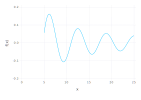

In [51]:
using Gadfly
pl=plot([x-> cos(x)/x], 5, 25)

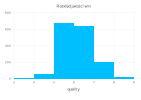

In [52]:
# histogram jakości wina
plot(mydata, x="quality" , Geom.histogram, Guide.title("Rozkład jakości win"))

In [53]:
using Gadfly, DataFrames
df4=CSV.read("medical.csv")
print("size is ", size(df4))
df4[1:50, 1:size(df4,2)]

size is (50, 7)

,Numer,Płeć,Wiek,sBP,dBP,Drink,BMI
1,0,1,39,106.0,70.0,0,26.97
2,1,2,46,121.0,81.0,0,28.73
3,2,1,48,127.5,80.0,1,25.34
4,3,2,61,150.0,95.0,1,28.58
5,4,2,46,130.0,84.0,1,23.1
6,5,2,43,180.0,110.0,0,30.3
7,6,2,63,138.0,71.0,0,33.11
8,7,2,45,100.0,71.0,1,21.68
9,8,1,52,141.5,89.0,0,26.36
10,9,1,43,162.0,107.0,1,23.61


In [54]:
df4[:Płeć]= [(value==1) ? "M" :"K" for (i, value) in enumerate(df4[:Płeć])]
df4[:Drink]= [(value==1) ? "T" :"N" for (i, value) in enumerate(df4[:Drink])]
df4[1:50, 1:size(df4,2)]


,Numer,Płeć,Wiek,sBP,dBP,Drink,BMI
1,0,M,39,106.0,70.0,N,26.97
2,1,K,46,121.0,81.0,N,28.73
3,2,M,48,127.5,80.0,T,25.34
4,3,K,61,150.0,95.0,T,28.58
5,4,K,46,130.0,84.0,T,23.1
6,5,K,43,180.0,110.0,N,30.3
7,6,K,63,138.0,71.0,N,33.11
8,7,K,45,100.0,71.0,T,21.68
9,8,M,52,141.5,89.0,N,26.36
10,9,M,43,162.0,107.0,T,23.61


In [55]:
describe(df4)

Numer
Summary Stats:
Mean:           24.500000
Minimum:        0.000000
1st Quartile:   12.250000
Median:         24.500000
3rd Quartile:   36.750000
Maximum:        49.000000
Length:         50
Type:           Union{Int64, Missings.Missing}
Number Missing: 0
% Missing:      0.000000

Płeć
Summary Stats:
Length:         50
Type:           String
Number Unique:  2

Wiek
Summary Stats:
Mean:           47.860000
Minimum:        35.000000
1st Quartile:   42.000000
Median:         46.000000
3rd Quartile:   52.750000
Maximum:        65.000000
Length:         50
Type:           Union{Int64, Missings.Missing}
Number Missing: 0
% Missing:      0.000000

sBP
Summary Stats:
Mean:           133.500000
Minimum:        96.000000
1st Quartile:   119.500000
Median:         131.500000
3rd Quartile:   145.750000
Maximum:        206.000000
Length:         50
Type:           Union{Float64, Missings.Missing}
Number Missing: 0
% Missing:      0.000000

dBP
Summary Stats:
Mean:           84.860000
Minimum:  

In [56]:
# odchylenie standardowe
std((df4[:Wiek]))

8.19409942007799

In [57]:
# średnia
mean(df4[:Wiek])

47.86

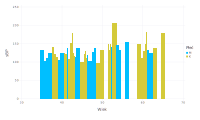

In [58]:
# wykres skórczowego ciśnienia krwi - systolic blood preassure (sBP)
# w zależności od wieku
# z podziałem wg płci
#
set_default_plot_size(20cm, 12cm)

plot(df4, x="Wiek", y="sBP", color="Płeć" , Geom.bar(position=:dodge))


### Pakiet RDatasets
- dostęp do kolekcji zbiorów danych do celów uczenia się, naukowych oraz rozwoju narzędzi do statystyki
- kolekcja z języka R udostępniona szerzej
- https://github.com/vincentarelbundock/Rdatasets
- lista pakietów on line  http://vincentarelbundock.github.io/Rdatasets/datasets.html

In [59]:
# lista pakietów 
using RDatasets
RDatasets.datasets()

INFO: Recompiling stale cache file /mnt/juliabox/.julia/lib/v0.6/RDatasets.ji for module RDatasets.


,Package,Dataset,Title,Rows,Columns
1,COUNT,affairs,affairs,601,18
2,COUNT,azdrg112,azdrg112,1798,4
3,COUNT,azpro,azpro,3589,6
4,COUNT,badhealth,badhealth,1127,3
5,COUNT,fasttrakg,fasttrakg,15,9
6,COUNT,lbw,lbw,189,10
7,COUNT,lbwgrp,lbwgrp,6,7
8,COUNT,loomis,loomis,410,11
9,COUNT,mdvis,mdvis,2227,13
10,COUNT,medpar,medpar,1495,10


In [60]:
# zbiór danych o wymiarach irysów http://vincentarelbundock.github.io/Rdatasets/doc/datasets/iris.html
# w formie DataFrame

iris = dataset("datasets", "iris")
DataFrames.head(iris)

INFO: Precompiling module RData.


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


#### Przykład: analiza danych z egzaminów szkolnych

In [61]:
# dane z egzaminów
mlmf=dataset("mlmRev", "Gcsemv")
DataFrames.head(mlmf)

,School,Student,Gender,Written,Course
1,20920,16,M,23.0,missing
2,20920,25,F,missing,71.2
3,20920,27,F,39.0,76.8
4,20920,31,F,36.0,87.9
5,20920,42,M,16.0,44.4
6,20920,62,F,36.0,missing


In [62]:
summary(mlmf)

"1905×5 DataFrames.DataFrame"

In [63]:
# dane z konkretnej szkoły
mlmf[mlmf[:School].=="68207", :]

,School,Student,Gender,Written,Course
1,68207,7,F,32.0,58.3
2,68207,84,F,25.0,41.6
3,68207,101,F,23.0,62.9
4,68207,126,F,26.0,57.4
5,68207,167,M,missing,50.0


In [64]:
dropmissing(mlmf)

,School,Student,Gender,Written,Course
1,20920,27,F,39.0,76.8
2,20920,31,F,36.0,87.9
3,20920,42,M,16.0,44.4
4,20920,101,F,49.0,89.8
5,20920,113,M,25.0,17.5
6,22520,1,F,48.0,84.2
7,22520,7,M,46.0,66.6
8,22520,9,F,28.0,47.2
9,22520,15,F,43.0,80.5
10,22520,16,M,29.0,57.4


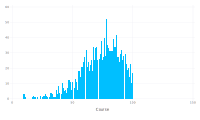

In [65]:
using Gadfly
# histogram ocen z kursu
plot(dropmissing(mlmf),x="Course" ,Geom.histogram)
   

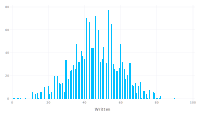

In [66]:
# histogram ocen z egzaminu
plot(dropmissing(mlmf),x="Written" ,Geom.histogram)

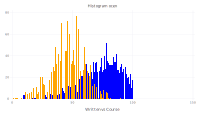

In [67]:
# na tym samym wykresie:
plot(Guide.title("Histogram ocen"),Guide.XLabel("Written vs Course"),
layer(dropmissing(mlmf),x="Written" ,Geom.histogram, Theme(default_color=colorant"orange")),
layer(dropmissing(mlmf),x="Course" ,Geom.histogram,  Theme(default_color=colorant"blue")),
)

In [68]:
# grupujemy wg kodu szkoły
groupby(mlmf, :School)

DataFrames.GroupedDataFrame  73 groups with keys: Symbol[:School]
First Group:
9×5 DataFrames.SubDataFrame{Array{Int64,1}}
│ Row │ School │ Student │ Gender │ Written │ Course  │
├─────┼────────┼─────────┼────────┼─────────┼─────────┤
│ 1   │ 20920  │ 16      │ M      │ 23.0    │ missing │
│ 2   │ 20920  │ 25      │ F      │ missing │ 71.2    │
│ 3   │ 20920  │ 27      │ F      │ 39.0    │ 76.8    │
│ 4   │ 20920  │ 31      │ F      │ 36.0    │ 87.9    │
│ 5   │ 20920  │ 42      │ M      │ 16.0    │ 44.4    │
│ 6   │ 20920  │ 62      │ F      │ 36.0    │ missing │
│ 7   │ 20920  │ 101     │ F      │ 49.0    │ 89.8    │
│ 8   │ 20920  │ 113     │ M      │ 25.0    │ 17.5    │
│ 9   │ 20920  │ 146     │ M      │ missing │ 32.4    │
⋮
Last Group:
22×5 DataFrames.SubDataFrame{Array{Int64,1}}
│ Row │ School │ Student │ Gender │ Written │ Course  │
├─────┼────────┼─────────┼────────┼─────────┼─────────┤
│ 1   │ 84772  │ 2       │ F      │ 53.0    │ missing │
│ 2   │ 84772  │ 7       │ F      

In [69]:
# agregowanie wg określonych kolumn, do pozostałych kolumn stosuje się funkcję podaną jako trzeci argument
sort(aggregate(mlmf, [:School, :Gender], length))

,School,Gender,Student_length,Written_length,Course_length
1,20920,F,5,5,5
2,20920,M,4,4,4
3,22520,F,43,43,43
4,22520,M,22,22,22
5,22710,F,11,11,11
6,22710,M,7,7,7
7,22738,F,4,4,4
8,22738,M,6,6,6
9,22908,F,5,5,5
10,22908,M,1,1,1


In [70]:
# Tworzenie listy wszystkich szkół z rezultatami dla co najmniej 50 studentów
# ze średnimi wynikami z egzaminu oraz średnimi ocenami z kursu
for subdf in groupby(mlmf, :School)
    (size(subdf)[1]> 50) &&
    @printf "%6s : %4d :%6.2f : %6.2f\n" subdf[:School][1] size(subdf)[1] mean((skipmissing(subdf[:Written])))   mean(skipmissing((subdf[:Course]))) 
end

 22520 :   65 : 35.84 :  56.45
 60457 :   54 : 53.34 :  85.61
 68107 :   79 : 44.41 :  74.19
 68137 :  104 : 28.92 :  62.62
 68321 :   52 : 52.00 :  78.64
 68411 :   84 : 40.96 :  59.21
 68809 :   73 : 42.68 :  70.98


In [71]:
# sortowanie po wynikach 
DataFrames.head(sort!(mlmf, cols=[:Written]))


,School,Student,Gender,Written,Course
1,22710,77,F,0.6,41.6
2,68137,65,F,2.5,50.0
3,22520,115,M,3.1,9.25
4,68137,80,F,4.3,50.9
5,68137,79,F,7.5,27.7
6,22710,57,F,11.0,73.1


In [72]:
#różnica pomiędzy ocenami z kursu i egzaminu
diff1=mlmf[:Course]- mlmf[:Written]
mean(skipmissing(diff1))

26.87908732764273

In [73]:
#odchylenie
std(skipmissing(diff1))

15.547498360728733

In [74]:
#najwyższa różnica
maximum(skipmissing(diff1))

76.0

In [75]:
#najniższa różnica
minimum(skipmissing(diff1))

-43.5

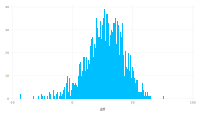

In [76]:
using Gadfly
# wykres histogramu różnic
plot(DataFrame(diff=collect(skipmissing(diff1))),x="diff" ,Geom.histogram)

In [77]:

hh=fit(Histogram, collect(Float64,skipmissing(diff1)))

StatsBase.Histogram{Int64,1,Tuple{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}}}
edges:
  -50.0:10.0:80.0
weights: [2, 1, 6, 16, 53, 124, 248, 407, 362, 214, 79, 10, 1]
closed: left
isdensity: false

In [78]:
# ile jest przypadków, że ocena z egzaminu jest wyższa niż z kursu?
sum(hh.weights[1:5])

78

In [79]:
# ile jest przypadków, że ocena z egzaminu jest niższa niż z kursu?
sum(hh.weights[6:13])

1445

In [80]:
# wybieramy przypadki bez wartości missing
df15=mlmf[completecases(mlmf[[:Written, :Course]]),:]
DataFrames.head(df15)

,School,Student,Gender,Written,Course
1,22710,77,F,0.6,41.6
2,68137,65,F,2.5,50.0
3,22520,115,M,3.1,9.25
4,68137,80,F,4.3,50.9
5,68137,79,F,7.5,27.7
6,22710,57,F,11.0,73.1


In [81]:
#czy oceny z egzaminu zależą od ocen z kursu ?
# wynik współczynnika corelacji świadczy o umiarkowanej 
# zależności dodatniej (im wyższa ocena z egzaminu, tym wyższa ocena z kursu)
cor(df15[:Written], df15[:Course])

0.4741707386424446

In [82]:
# regresja liniowa
lr=linreg(convert(Array,df15[:Written]), convert(Array,df15[:Course]))

(46.48997278026537, 0.5782813698326208)

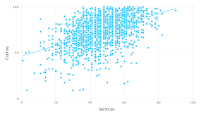

In [83]:
# wynik regresji linowej można też uzyskać  na wykresie używająć  Geom.smooth(method=:lm)

plot(df15, x="Written", y="Course",Geom.point, Geom.smooth(method=:lm))

In [84]:
# Przydatna opcja Geom.subplot_grid pozwala organizować dane w grupy wykresów
# więcej na http://gadflyjl.org/stable/lib/geoms/geom_subplot_grid.html#Geom.subplot_grid-1
plot(df15, x=:Written, y=:Course, xgroup=:Gender, Geom.subplot_grid(Geom.bar))


MethodError: [91mMethodError: no method matching discretize_make_pda(::CategoricalArrays.CategoricalArray{String,1,UInt8,String,CategoricalArrays.CategoricalString{UInt8},Union{}}, ::Array{CategoricalArrays.CategoricalString{UInt8},1})[0m
Closest candidates are:
  discretize_make_pda([91m::Array{T,1} where T[39m, ::Any) at /home/jrun/.julia/v0.6/Gadfly/src/scale.jl:263
  discretize_make_pda([91m::DataArrays.DataArray[39m, ::Any) at /home/jrun/.julia/v0.6/Gadfly/src/scale.jl:271
  discretize_make_pda([91m::Range[39m, ::Any) at /home/jrun/.julia/v0.6/Gadfly/src/scale.jl:279
  ...[39m

####  Inne pakiety do wizualizacji:

- Plots https://github.com/JuliaPlots/Plots.jl oraz odpowiadajacy mu pakiet do DataFrames https://github.com/JuliaPlots/StatPlots.jl 
- PyPlot - interfejs do Pythonowej biblioteki matplotlib 
- TextPlots - prosta wizualizacja tekstowa




####  Julia oferuje zaawansowane pakiety do analizy danych: 

https://julialang.org/ecosystems/ sekcja DataScience


 - JuliaML – Machine Learning (JuliaML)
 - JuliaStats – Statistics
 - JuliaImages – Image Processing
 - JuliaText – Natural Language Processing (NLP), Computational Linguistics and (textual) Information Retrieval
 - JuliaDatabases – Various database drivers for Julia
 - JuliaData – Data manipulation, storage, and I/O in Julia


http://pkg.julialang.org/


